In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets, linear_model
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import tweepy
import json
from bs4 import BeautifulSoup
import requests
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df=pd.read_csv('Database\CompleteDataset.csv')

C:\Users\Samuel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
def arrumapreco(valor):  #função que retira todos os sinais(emocotions continuam)
    if "M" in valor:
        valor=valor.replace("M","00000")
        valor=valor.replace("€","")
        valor=valor.replace(".","")
    
    else:
        valor=valor.replace("K","000")
        valor=valor.replace("€","")
        valor=valor.replace(".","")
        
    return int(valor)/1000000

def arrumaatt(att):
    if type(att) !=int:
        if "+" in att:
            att=att[:att.find("+")]
        elif "-" in att:
            att=att[:att.find("-")]
    return att
def followers(user):
    url = 'https://www.twitter.com/'+user
    r = requests.get(url)
    soup = BeautifulSoup(r.content,"lxml")

    f = soup.find('li', class_="ProfileNav-item--followers")
    title = f.find('a')['title']

    num_followers = int(title.split(' ')[0].replace('.',''))
    print (num_followers)
    return num_followers

In [66]:
features=["Acceleration","Agility","Ball control","Dribbling","Long shots","Marking","Reactions","Short passing","Shot power","Sliding tackle","Stamina","Strength","Volleys"]

df=df.rename(columns = {'Preferred Positions':'Positions'})
dfataq=df[(df.Positions == 'ST LW ') | (df.Positions == 'RW ') | (df.Positions == 'LW ') | (df.Positions == 'ST ')| (df.Positions == 'CF ')| (df.Positions == 'ST RW ')| (df.Positions == 'CAM ')]


for i in features:
    dfataq[i]=dfataq[i].apply(arrumaatt)

C:\Users\Samuel\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
X = dfataq[features]

y=dfataq["Value"].apply(arrumapreco)
print(dfataq.Value[0])
print(y[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

€95.5M
95.5


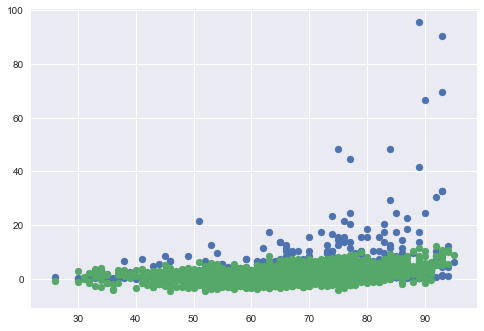

In [68]:
regr = linear_model.LinearRegression()# cria o modelo

regr.fit(X_train, y_train) # treina o modelo

xfit = X_train
yfit = regr.predict(X_train)

plt.scatter(X_train["Acceleration"],y_train)
plt.scatter(X_train["Acceleration"], yfit)

In [69]:
#OLS
yy = y_train
XX = X_train
XX = sm.add_constant(XX)

model = sm.OLS(yy, XX.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     53.71
Date:                Thu, 16 Nov 2017   Prob (F-statistic):          4.09e-121
Time:                        10:36:24   Log-Likelihood:                -6215.5
No. Observations:                2159   AIC:                         1.246e+04
Df Residuals:                    2145   BIC:                         1.254e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -18.3896      0.993    -18.522      0.000     -20.337     -16.443
Acceleration       0.0537      0.013      4.201      0.000       0.029       0.079
Agility           -0.0166      0.013     -1.280      0.201      -0.042       0.009
Ball control       0.1076      0.026      4.124      0.000       0.056       0.159
Dribbling          0.0328      0.023      1.416      0.157      -0.013       0.078
Long shots         0.0415      0.015      2.731      0.006       0.012       0.071
Marking           -0.0124      0.016     -0.765      0.444      -0.044       0.019
Reactions          0.0747      0.016      4.593      0.000       0.043       0.107
Short passing      0.0460      0.017      2.702      0.007       0.013       0.079
Shot power        -0.0140      0.018     -0.757      0.449      -0.050       0.022
Sliding tackle    -0.0187      0.016     -1.210      0.227      -0.049       0.012
Stamina            0.0059      0.011      0.554      0.580      -0.015       0.027
Strength           0.0033      0.009      0.356      0.722      -0.015       0.022
Volleys            0.0006      0.015      0.039      0.969      -0.028       0.029
==============================================================================
Omnibus:                     3508.250   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2427813.499
Skew:                          10.422   Prob(JB):                         0.00
Kurtosis:                     165.953   Cond. No.                     2.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
estim = regr.predict(X)
dfataq['Estim']=estim
dfataq[["Name","Value","Estim"]]

C:\Users\Samuel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,Value,Estim
0,Cristiano Ronaldo,€95.5M,11.549560
1,L. Messi,€105M,12.092742
2,Neymar,€123M,10.613956
3,L. Suárez,€97M,10.392479
5,R. Lewandowski,€92M,9.878101
7,E. Hazard,€90.5M,10.616019
9,G. Higuaín,€77M,8.920666
15,G. Bale,€69.5M,9.670101
16,S. Agüero,€66.5M,10.350439
23,P. Aubameyang,€61M,8.879064


In [71]:
nome=df["Name"][0]
nome="Cristiano Ronaldo"
listtwitter=[]

for nome, team in zip(df["Name"], df["Club"]):
    print(nome)
    #print(team)
    search=""
    tsearch=""
    for i in nome.split():
        search+=i+"+"
    for i in team.split():
        tsearch+=i+"+"
        
    search=search[:-1]
    tsearch=tsearch[:-1]
    url = "https://www.google.com.br/search?q="+search+"+Twitter+Official"
    print(url)
    #print()
    r = requests.get(url)
    soup = BeautifulSoup(r.content,"lxml")

    a=soup.find_all('a')
    #print(url)
    
    for i in a:
        string=str(i)
        
        if "twitter.com/" in string and "search" not in string:        
            twitter=string[string.find("@"):].split()[0][:-1]
            twitter=twitter.replace("</b>","")
            twitter=twitter.replace("<b>","")
            print(twitter)
            listtwitter.append(followers(twitter))
            break
        
    break
    print()

Cristiano Ronaldo
https://www.google.com.br/search?q=Cristiano+Ronaldo+Twitter+Official


ConnectionError: HTTPSConnectionPool(host='www.google.com.br', port=443): Max retries exceeded with url: /search?q=Cristiano+Ronaldo+Twitter+Official (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x00000151A76904E0>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed',))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


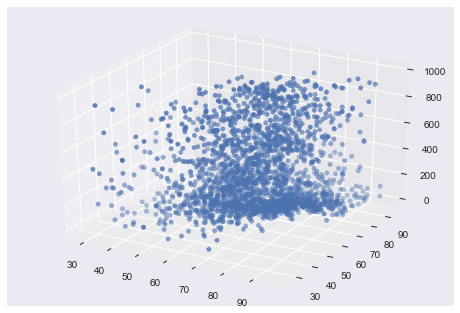

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs=dfataq["Agility"].astype(float)
ys=dfataq["Acceleration"].astype(float)
zs=y

print(type(xs))
print(type(zs))
print(type(y))



ax.scatter(xs, ys, zs)